In [39]:
#import all the libraries needed
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import boto3


In [40]:
#credentials to access Redshift 
b_host = 'finalbucketdlworkgroup.369529297722.us-east-1.redshift-serverless.amazonaws.com'
db_port = 5439
db_name = 'dev'
db_user = 'admin'
db_password = 'Searise1!'

In [28]:
#Check My connection
try:
    conn = psycopg2.connect(
        host=db_host,
        port=db_port,
        database=db_name,
        user=db_user,
        password=db_password
    )
    print("Connection successful")
except Exception as e:
    print(f"Error: {e}")

Connection successful


In [29]:
#Query all of my data
sql_query = """
SELECT * FROM  "dev"."finalbucketdl"."csv";
"""

In [30]:
#Load my data into a dataframe so I can use pandas
df = pd.read_sql_query(sql_query,conn)

C:\Users\Osei\AppData\Local\Temp\ipykernel_10000\561621688.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query,conn)


In [31]:
#Display my data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [32]:
#Check to get info on the structure of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [33]:
#Check to see if there are any nulls
df.isnull().values.any()

False

I wanted to see which positions have the hightest compensation, with certain conditions. Since I live in the US and I'm looking for entry position. This would helpfully to me.
I later used a graph to visualize my insights

In [34]:
#Filter the columns to only contain position that are in the US and entry level
df2 = df[(df['employee_residence'] == 'US') & (df['experience_level'] == 'EN')]


In [35]:
#Check the data
df2.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
13,2023,EN,FT,Applied Scientist,213660,USD,213660,US,0,US,L
14,2023,EN,FT,Applied Scientist,130760,USD,130760,US,0,US,L
42,2023,EN,FT,Applied Scientist,204620,USD,204620,US,0,US,L
43,2023,EN,FT,Applied Scientist,110680,USD,110680,US,0,US,L
95,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,0,US,M
96,2023,EN,FT,Machine Learning Engineer,145885,USD,145885,US,0,US,M
113,2023,EN,FT,Research Scientist,220000,USD,220000,US,50,US,L
137,2023,EN,FT,Data Engineer,85000,USD,85000,US,0,US,M
138,2023,EN,FT,Data Engineer,65000,USD,65000,US,0,US,M
141,2023,EN,FT,Data Analyst,75000,USD,75000,US,0,US,M


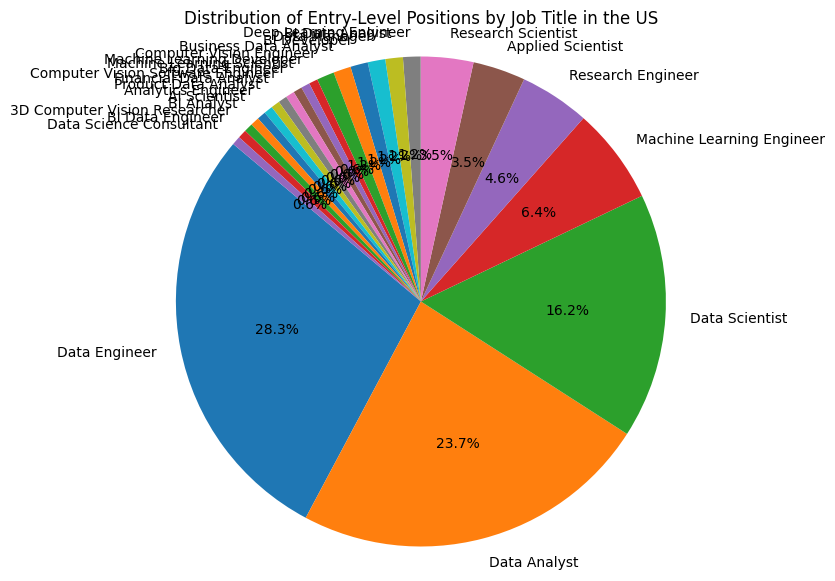

In [36]:
#Translate my graph into a pie chart
job_counts = df2['job_title'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Entry-Level Positions by Job Title in the US')
plt.axis('equal')  #I like this part it changes the aspect ratio
plt.show()

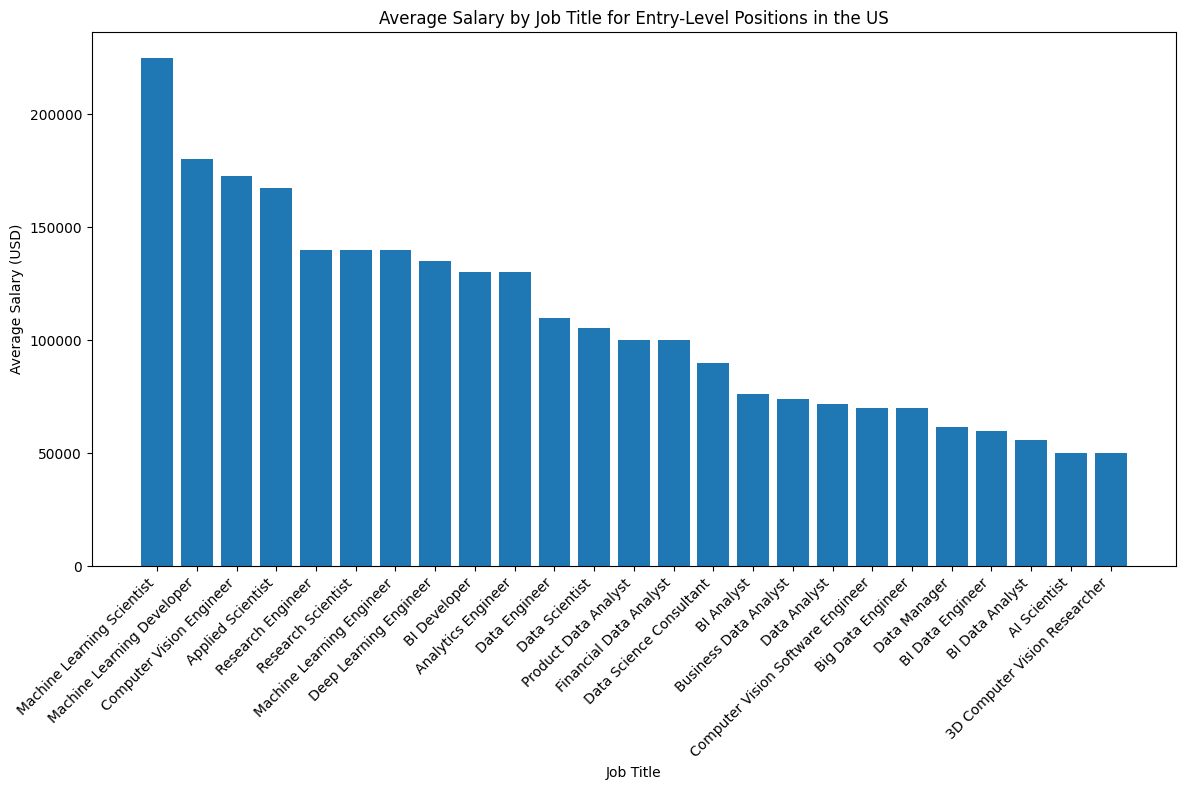

In [37]:


#Wanted to see the average salary of the job for entry level position is the US only
job_salary_stats = df2.groupby('job_title')['salary_in_usd'].mean().reset_index()


job_salary_stats_sorted = job_salary_stats.sort_values(by='salary_in_usd', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(job_salary_stats_sorted['job_title'], job_salary_stats_sorted['salary_in_usd'])
plt.title('Average Salary by Job Title for Entry-Level Positions in the US')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

As you can see Machine Learning position and positions associated to Machine Learning positions are highly compensated even for entry levels 

Next I wanted to see how many average position was remote and how many positions that are not remote. As you can see relative to what is being portayed in the News many of the positions are still remote. Almost more than half

In [48]:

df_us = df[df['employee_residence']=="US"]
sort_by_remote = df_us.sort_values(by='remote_ratio', ascending=False)
remote_job_count = df_us[df_us['remote_ratio'] == 100].shape[0]
remote_job_count




1302

In [51]:
df_no_remote = df[df['remote_ratio']==0].shape[0]
df_no_remote


1923